# Data Exploration 1 - Effects of Exchange Rate

Due to the dozen or so various input parameters for the marketplace simulation, it is prudent to investigate their effect on the output data - for example number of successful sellers, FOREX rates, and so on. This not only allows us to test our assumptions and effectiveness of the simulation, but it can allow us to get a more intuitive understanding of the process. With this as motivation, this notebook and the following (Data Exploration 2) is devoted to the exploration of the output data from marketplace.py and its dependence on the input variables. 

This notebook is structured:
    1. Comparison of Exchange Rate fluctuations between models
    2. Exchange Rate and effect on Number of Sales
        i. Sinuosoidal exchange model
        ii. Geometric Brownian Motion model
        iii. Statistical Correlations between Exchange Rate and Sales
    3. Effects of the Predictor Variables
        i. Numbers of Buyers and Sellers
        ii. Currency amounts and seller exchange rates

# 1. Comparison of Exchange Rate fluctuations between models 

There are three possible models for the exchange rate - constant (fixed), sinuosoidal and geometric Brownian motion. The first step should be to plot these side-by-side to get an understanding of their behaviour.

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

### Import the dataset
constant_rate = pd.read_csv('exploration_data/constant_rate_example_2_rates.csv');
sine_rate = pd.read_csv('exploration_data/sine_rate_example_2_rates.csv');
gbm_rate = pd.read_csv('exploration_data/gbm_rate_example_2_rates.csv');

## UNCOMMENT TO PRINT PARAMETERS ##
#pd.read_csv('exploration_data/gbm_rate_example_2_params.csv').transpose()

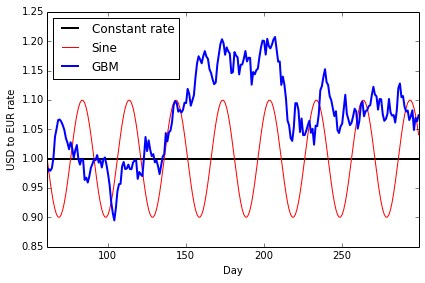

In [2]:
# Make the plots
ax1 = constant_rate.plot(kind='line',x='Day',y='USD to EUR rate',color='k',label='Constant rate',linewidth=2)
ax1.set_ylabel('USD to EUR rate')
sine_rate.plot(kind='line',x='Day',y='USD to EUR rate',color='r',ax=ax1,label='Sine')
gbm_rate.plot(kind='line',x='Day',y='USD to EUR rate',color='b',linestyle='solid',ax=ax1,linewidth=2,label='GBM')
plt.tight_layout()

# 2. Exchange Rate and effect on Number of Sales
The number of successful sales per day for sellers in each currency can also be studied using our data set, so let's do this for the Sine and GBM models seperately.

## i. Sine model

The sine model is really useful here because of its regular periodicity, which subsequently makes the impact of the exchange rate on the number of sales easier to see. Here a rolling mean has been used to smooth out the kinks in the seller figures which arise from the randomness in the amounts and individual rates of the sellers. Recall that the rates are chosen from a Gaussian distribution around the mean, with a 

The number of sales is also normalised by dividing by the number of sellers introduced to the market on that day. This number can be greater than 1.0 because sellers from previous days still go to market unless their order is cancelled. The cutoff used for cancellation in this data set was 60 days and the sine oscillation period 30 days.

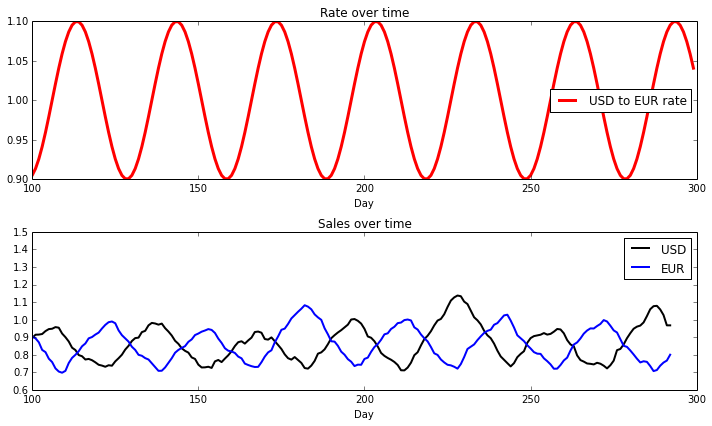

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 6))
sine_rate.plot(kind='line',x='Day',y='USD to EUR rate',color='r',ax=axes[0],linewidth=3,label='USD to EUR rate',xlim=(100,300))
axes[0].set_title('Rate over time') ; axes[1].set_title('Sales over time')
mean = pd.rolling_mean(sine_rate[['Day','USD sales']], window=15, min_periods=1)
mean.plot(kind='line',x='Day',y='USD sales',color='k',ax=axes[1], label='USD',xlim=(100,300),linewidth=2)
mean = pd.rolling_mean(sine_rate[['Day','EUR sales']], window=15, min_periods=1)
mean.plot(kind='line',x='Day',y='EUR sales',color='b',ax=axes[1], label='EUR',xlim=(100,300),linewidth=2)
plt.tight_layout()

## ii. Geometric Brownian Motion

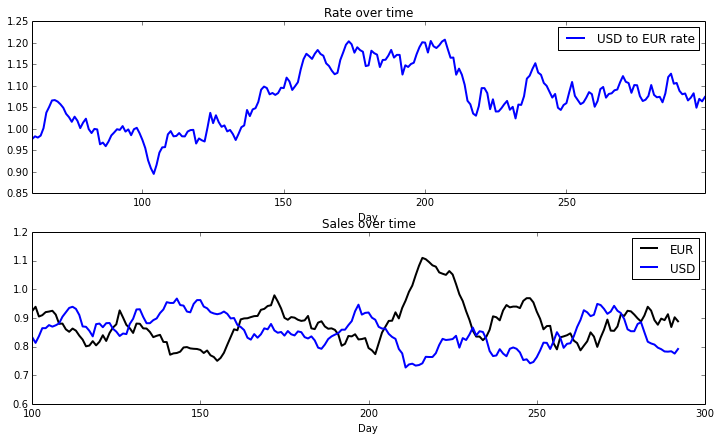

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 6))
axes[0].set_title('Rate over time')
axes[1].set_title('Sales over time')
plt.tight_layout()

gbm_rate.plot(kind='line',x='Day',y='USD to EUR rate',color='b',linestyle='solid',ax=axes[0],linewidth=2)

mean = pd.rolling_mean(gbm_rate[['Day','EUR sales']], window=15, min_periods=1)
mean.plot(kind='line',x='Day',y='EUR sales',color='k',ax=axes[1], label='EUR',xlim=(100,300),linewidth=2)
mean = pd.rolling_mean(gbm_rate[['Day','USD sales']], window=15, min_periods=1)
mean.plot(kind='line',x='Day',y='USD sales',color='b',ax=axes[1], label='USD',linestyle='solid',xlim=(100,300),linewidth=2)


## Statistical Correlations between Exchange Rate and Sales

Correlation is a useful statistical tool that can reveal the strength of association between two variables. In this  section the correlation is measured between the features of the imported SINE and GBM rate dataframes. The matrix generated is symmetric and the elements correspond to the value of correlation, 0 being uncorrelated, 1 being high positive correlation, and -1 being high negative correlation. In plain English, the latter means as one goes up the other goes down.

In [5]:
print ' ------- SINE CORRELATION MATRIX ------ \n'
print sine_rate.corr(method='pearson',)

print '\n ------- ROLLING MEAN SINE CORRELATION MATRIX ------ \n'
print pd.rolling_mean(sine_rate, window=10, min_periods=2).corr(method='pearson')

print '\n ------- GBM CORRELATION MATRIX ------ \n'
print gbm_rate.corr(method='pearson',)


print '\n ------- ROLLING MEAN GBM CORRELATION MATRIX ------ \n'
print pd.rolling_mean(gbm_rate, window=30, min_periods=2).corr(method='pearson')

 ------- SINE CORRELATION MATRIX ------ 

                      Day  EUR sales  USD sales  USD to EUR rate
Day              1.000000  -0.017120   0.095804         0.095598
EUR sales       -0.017120   1.000000  -0.370305        -0.145188
USD sales        0.095804  -0.370305   1.000000         0.146889
USD to EUR rate  0.095598  -0.145188   0.146889         1.000000

 ------- ROLLING MEAN SINE CORRELATION MATRIX ------ 

                      Day  EUR sales  USD sales  USD to EUR rate
Day              1.000000  -0.087993   0.198955         0.087401
EUR sales       -0.087993   1.000000  -0.763933        -0.216687
USD sales        0.198955  -0.763933   1.000000         0.227102
USD to EUR rate  0.087401  -0.216687   0.227102         1.000000

 ------- GBM CORRELATION MATRIX ------ 

                      Day  EUR sales  USD sales  USD to EUR rate
Day              1.000000   0.074342  -0.158845         0.474307
EUR sales        0.074342   1.000000  -0.348857        -0.110942
USD sales      

## Sales vs Rates conclusion

Written in this form, the matrices uncover several useful relationships in the data. Firstly, the correlation between 'USD sale' and the 'EUR sales' is strongly negative in both models. This seems intuitive - as the buying power of USD buyers increases it follows that they are able to purchase more EUR. This reasoning can also be inverted - the shift in rate causes EUR sellers, who have specified their rate already, to become more attractive to potential buyers.

A second observation is the apparent weak correlation of the rate to sales. While this can be increased by using a rolling mean to smooth out the randomness this does not account for the low correlation in the Sine model. This is due to the way correlation is calculated, as it is unable to account for the slight delay between the change in rate and the market response. A cross-correlation method, a common technique in signal processing, could be used to account for this but is beyond the scope of this project.

One slight concern is the moderate positive correlation (+0.47 and +0.53 for the rolling mean) between 'Day' and 'USD to EUR rate' in the GBM model, as we would initially expect it to be zero due to the random fluctuations. A weakness with this specific model is that its underlying mathematical form means that over time it will increase exponentially - it has an expectation value at time $t$ of
$$ \mathbb{E}(x) = x_0 e^{\mu t}. $$
In other words, although the short-term behaviour seems quite random, eventually the USD to EUR rate will increase exponentially and this is something we should be aware of when proceeding.

In conclusion, it is clear that the exchange rate affects the number of successful trades in each currency. This serves as a good test of the models used 

# 3. Effects of the predictor variables

Our marketplace simulation has a lot of predictor variables - inputs that we set initially that affect the final result. It is prudent to get a good understanding of this relationship, and this will be explored in this section. 

## i. Number of Buyers and Sellers

In the previous data, the number of buyers and sellers has been assumed to be equal and fixed at 100 each, in both currencies. In the project brief we are told that this can be different (or rather, the frequency of trades is different), so let us now examine the impact of causing an imbalance of traders in the market.

Below we have used the sine model to compare and contrast the cases of 100 sellers in each market (black) to the case where there are 120 buyers/sellers in EUR and 100 in USD (red).

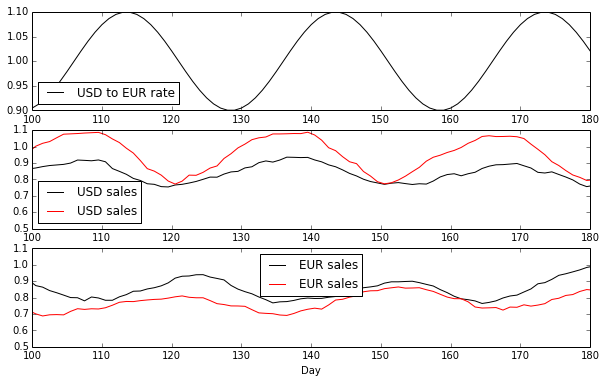

In [6]:
n_100_sine = pd.read_csv('exploration_data/sine_rate_example_2_rates.csv');
n_120_sine = pd.read_csv('exploration_data/n_eur_120_sine_pred_var_rates.csv');

## Plot Rate
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(10, 6))
n_100_sine.plot(kind='line',x='Day',y='USD to EUR rate',color='k',ax=axes[0],xlim=(100,180))

# Rolling Mean
n_100_sine = pd.rolling_mean(n_100_sine, window=20, min_periods=1)
n_120_sine = pd.rolling_mean(n_120_sine, window=20, min_periods=1)
# Plot USD sellers
n_100_sine.plot(kind='line',x='Day',y='USD sales',color='k',ax=axes[1],xlim=(100,180),ylim=(0.5,1.1))
n_120_sine.plot(kind='line',x='Day',y='USD sales',color='r',ax=axes[1],xlim=(100,180),ylim=(0.5,1.1))
# Plot EUR sellers
ax2 = n_100_sine.plot(kind='line',x='Day',y='EUR sales',color='k',ax=axes[2],xlim=(100,180),ylim=(0.5,1.1))
n_120_sine.plot(kind='line',x='Day',y='EUR sales',color='r',ax=axes[2],xlim=(100,180),ylim=(0.5,1.1))

As one would expect, the increased number of buyers on the EUR side of the market has increased the USD sales. The increased EUR sellers has also increased the volume of sales.

The way N is chosen can also be variable. A fixed value has been used up until this point however a Gaussian distribution about a mean value chosen in the set_params() function, which varies the number of buyers and sellers between each market iteration. This has the effect of causing more noise in the USD and EUR sales numbers above, which intensifies as the standard deviation of this Gaussian is increased.

## ii. Currency Amounts and Seller Exchange Rates

Recall that the amounts and rates for each seller are chosen randomly, from a Gaussian distribution about the mean for the former and from a Log-normal distribution for the latter. The mean and standard deviation for the latter have been fixed at $$ \mu = 9.0$$ and $$\sigma = 1.0$$ in both markets in the previous data.

The playoff between these parameters in each model can be understood using the interactive plot below. Clearly, if one market prefers to buy and sell with different amounts of currency or with a different distribution of amounts, this will affect sales between the two. To further understanding, move the sliders from the default position to the values
$$ \mu = 9.5$$
and 
$$ \sigma = 0.5.$$


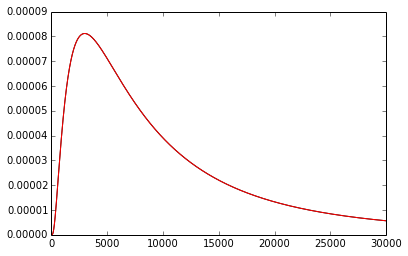

<function __main__.pltln>

In [7]:
from IPython.html.widgets import *
from scipy.stats import lognorm

def pltln(sigma,mu):
    logn_1 = lognorm(s=1.0, scale = np.exp(9.0));
    logn_2 = lognorm(s=sigma, scale = np.exp(mu));
    rng = np.arange(0.1,30000.0,1.0)
    plt.plot(rng,logn_1.pdf(rng),'k')
    plt.plot(rng,logn_2.pdf(rng),'r')
    plt.show()
    
interact(pltln, sigma =(0.5,1.6,0.1),mu=(8.0,10.1,0.1))

Now we'll apply this reasoning to understand the impact on sales. This has been plotted below where the USD distribution has been fixed using the default parameters, and the EUR distribution has been changed to the new ones for comparison. The Gaussian choice of the numbers of buyers/sellers from the previous section has been maintained.

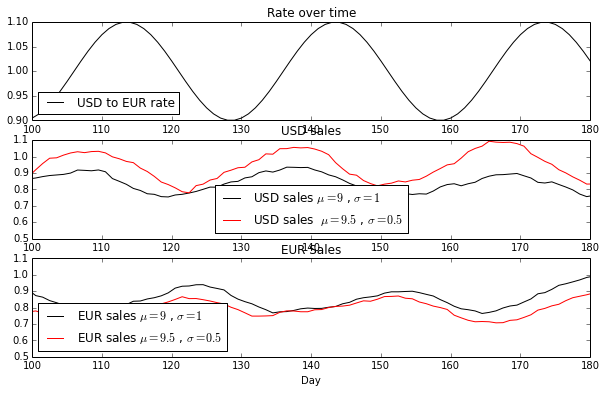

In [8]:
mu_9_sd_1 = pd.read_csv('exploration_data/sine_rate_example_2_rates.csv');
mu_9_5_sd_0_5 = pd.read_csv('exploration_data/mu_9_5_sd_0_5_sine_pred_var_rates.csv');

## Plot Rate
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(10, 6))
mu_9_sd_1.plot(kind='line',x='Day',y='USD to EUR rate',color='k',ax=axes[0],xlim=(100,180))
axes[0].set_title('Rate over time') ; axes[1].set_title('USD sales'); axes[2].set_title('EUR Sales')
# Rolling Mean
mu_9_sd_1 = pd.rolling_mean(mu_9_sd_1, window=20, min_periods=1)
mu_9_5_sd_0_5 = pd.rolling_mean(mu_9_5_sd_0_5, window=20, min_periods=1)
# Plot USD sellers
mu_9_sd_1.plot(kind='line',x='Day',y='USD sales',color='k',ax=axes[1],xlim=(100,180),ylim=(0.5,1.1),label=r'USD sales $\mu = 9$ , $\sigma = 1$')
mu_9_5_sd_0_5.plot(kind='line',x='Day',y='USD sales',color='r',ax=axes[1],xlim=(100,180),ylim=(0.5,1.1),label=r'USD sales  $\mu = 9.5$ , $\sigma = 0.5$')
# Plot EUR sellers
ax2 = mu_9_sd_1.plot(kind='line',x='Day',y='EUR sales',color='k',ax=axes[2],xlim=(100,180),ylim=(0.5,1.1),label=r'EUR sales $\mu = 9$ , $\sigma = 1$')
mu_9_5_sd_0_5.plot(kind='line',x='Day',y='EUR sales',color='r',ax=axes[2],xlim=(100,180),ylim=(0.5,1.1),label=r'EUR sales $\mu = 9.5$ , $\sigma = 0.5$')

# Summary

In this notebook the effects of the exchange rate and the various ways of modelling it have been studied. In the next notebook, data_exploration_2.ipynb, the effects of varying the characteristics of traders in each market will be studied.